# Keras를 이용한 손글씨 인식 딥러닝
- TensorFlow로 작성된 프로그램은 sklearn Library를 사용할 때 보다 어렵다.
- keras는 머신러닝 라이브러리 테아노(Theano)와 TensorFlow를 Wrapping한 라이브러리

In [1]:
import pandas as pd
train = pd.read_csv('../Data/train_20k.csv' , header = None)
test = pd.read_csv('../Data/test_1k.csv' , header = None)
print(train.head())
print(test.head())
print(train.count())

   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    5    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    9    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]
   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    7    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    2    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    1    0    0    0    0    0    0    0    0    0

### Preprocessing(전처리)

In [2]:
# train null
train.isnull().sum().sum()

0

In [3]:
# test null
test.isnull().sum().sum()

0

In [4]:
train.iloc[:,0]
train.iloc[:,1:].max().unique()

array([  0, 116, 254, 216,   9,   8, 157, 255, 253, 237, 142, 197,  58,
        29, 231, 182,  65,  96, 100, 202, 165,  76, 200,  47, 177, 172,
       191, 196, 252, 248, 178,  31, 220,   1,  91, 128, 112, 225, 121,
         7, 226, 184,  94,  40, 107, 103, 106, 102,  51,  18, 129, 233,
        39,  50, 185, 251,  72, 159,  84,  28, 241, 212,  98, 126, 249,
       145,  87, 104,  38, 239, 137, 244,  62])

In [5]:
# train 과 test를 Feature와 Target으로 분리하고 정규화 하기
train_label = train.iloc[:,0]
train_data = train.iloc[:,1:] 
train_data= train_data / 255

test_label = test.iloc[:,test.columns == 0]
test_data = test.iloc[:, test.columns != 0] 
test_data = test_data / 255

print(train_label[0:5])
print(train_data[0:5])
print('*' * 20)
print(test_label[0:5])
print(test_data[0:5])

0    5
1    0
2    4
3    1
4    9
Name: 0, dtype: int64
   1    2    3    4    5    6    7    8    9    10   ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 784 columns]
********************
   0
0  7
1  2
2  1
3  0
4  4
   1    2    3    4    5    6    7    8    9    10   ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  

### Deep Learning Model 만들기

In [6]:
# GPU 사용 설정
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [7]:
from tensorflow import keras

In [8]:
# 입력층 784개
# HL 512 노드
# 출력층 10개 (숫자 0~9)
# optimizer adam 

In [9]:
model = keras.Sequential()
# activation Function이 들어가야한다. activation = sigmoid , tanh(하이퍼탄젠트) , relu , softmax , leakyRelu
model.add(keras.layers.Dense(512, activation = 'relu', input_shape = (784,))) # 은닉층
model.add(keras.layers.Dense(10, activation = 'softmax')) # 출력층

In [10]:
# 손실함수
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy' , metrics = 'accuracy') # 정답이 0~9 정수라서 sparse_categorical_crossentropy사용

In [11]:
# 학습 시키기
import numpy as np
# 딥러닝은 판다스 취급도 안함 넘파이로 변환해줘야 한다.
model.fit(np.array(train_data) , np.array(train_label) , epochs= 20 )

Epoch 1/20
626/626 [==============================] - 2s 3ms/step - loss: 0.3206 - accuracy: 0.9072
Epoch 2/20
626/626 [==============================] - 2s 3ms/step - loss: 0.1279 - accuracy: 0.9623
Epoch 3/20
626/626 [==============================] - 2s 3ms/step - loss: 0.0783 - accuracy: 0.9769
Epoch 4/20
626/626 [==============================] - 2s 3ms/step - loss: 0.0504 - accuracy: 0.9847
Epoch 5/20
626/626 [==============================] - 2s 3ms/step - loss: 0.0324 - accuracy: 0.9911
Epoch 6/20
626/626 [==============================] - 2s 3ms/step - loss: 0.0363 - accuracy: 0.9891
Epoch 7/20
626/626 [==============================] - 2s 3ms/step - loss: 0.0165 - accuracy: 0.9955
Epoch 8/20
626/626 [==============================] - 2s 3ms/step - loss: 0.0114 - accuracy: 0.9973
Epoch 9/20
626/626 [==============================] - 2s 4ms/step - loss: 0.0174 - accuracy: 0.9954
Epoch 10/20
626/626 [==============================] - 2s 3ms/step - loss: 0.0065 - accuracy: 0.9986

In [12]:
model.evaluate(test_data ,  np.array(test_label))

32/32 [==============================] - 0s 2ms/step - loss: 0.1052 - accuracy: 0.9750


[0.10515567660331726, 0.9750249981880188]

---
### 테스트 데이터로 평가하기

In [13]:
score = model.evaluate(test_data ,  test_label)
print('loss :' , score[0])
print('accuracy :' , score[1])

32/32 [==============================] - 0s 2ms/step - loss: 0.1052 - accuracy: 0.9750
loss : 0.10515567660331726
accuracy : 0.9750249981880188


---
### Test_data로 predict해보기

In [20]:
pred = model.predict(test_data)
print("test label: ", test_label[:10])
print("pred :", np.argmax(pred[:10] , axis=1) ) # argmax 제일 큰 인덱스 값 가져오기

32/32 [==============================] - 0s 2ms/step
test label:     0
0  7
1  2
2  1
3  0
4  4
5  1
6  4
7  9
8  5
9  9
pred : [7 2 1 0 4 1 4 9 6 9]


In [16]:
pred[:10] # softmax로 1 데이터 당 확률값 10개가 나온다. 
# [1.4041609e-14, 3.9337964e-17, 2.5450827e-13, 1.7960393e-09,1.9920277e-20, 2.8238336e-19, 3.3984478e-25, 
# 1.0000000e+00,1.1527995e-14, 1.5972657e-13] 
# 첫번째 데이터의 확률 중에서 0~9중 7일 확률이 1.0000000e+00 로 가장 높다

array([[1.4041609e-14, 3.9337964e-17, 2.5450827e-13, 1.7960393e-09,
        1.9920277e-20, 2.8238336e-19, 3.3984478e-25, 1.0000000e+00,
        1.1527995e-14, 1.5972657e-13],
       [5.1386217e-16, 1.8235914e-06, 9.9999809e-01, 3.7376903e-08,
        4.2328827e-25, 2.6821866e-13, 4.1695811e-13, 9.5097969e-20,
        8.2734687e-12, 8.4800649e-19],
       [1.3774600e-11, 9.9999917e-01, 3.1507716e-07, 6.1735832e-11,
        2.9215375e-08, 4.3804131e-12, 3.0089911e-09, 4.7771954e-07,
        2.7601956e-08, 1.5630884e-12],
       [1.0000000e+00, 1.4991607e-11, 1.0917721e-09, 3.3410899e-11,
        1.8306701e-13, 7.5125933e-11, 6.8876806e-09, 3.1120877e-08,
        5.6856286e-15, 1.1760418e-09],
       [2.9251319e-12, 2.5323524e-14, 5.6913334e-13, 7.6079904e-17,
        9.9999857e-01, 4.7191065e-14, 1.4581268e-10, 1.1306632e-09,
        6.5655509e-11, 1.4165603e-06],
       [1.7183249e-14, 1.0000000e+00, 4.9609011e-11, 8.7720982e-14,
        1.5062762e-09, 3.5470223e-17, 7.4054830e-14, 4.72

In [21]:
np.argmax(np.array([1,4,3,2])) 
# index값을 내놓는다! 1번 인덱스가 가장 크다 

1

---
# 번외 : Image 만들기
얼굴 인식

In [22]:
from PIL import Image

In [23]:
# 0번의 정답을 제외한 데이터 만들기
train1 = train.loc[:, train.columns != 0]
train1.shape

(20001, 784)

In [24]:
# train_data의 50번의 크기 조절하기
abc = np.array(train1.iloc[50]).reshape(28,28)
abc.shape

(28, 28)

In [25]:
# Image 만들기
image = Image.fromarray((abc).astype(np.uint8)) # uint8 : gray scale
image

In [26]:
# image 저장하기
image.save("../Data/mnist_test3.jpg",  "JPEG")

---
# 이미지를 불러서 Predict 해보기

In [27]:
# image 불러오기
img = Image.open("../Data/mnist_test3.jpg")
img

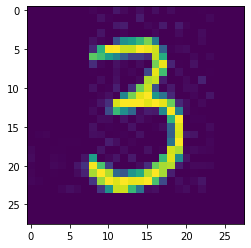

In [28]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [29]:
# image를 numpy 배열로 변환
imgArray = np.array(img)
imgArray = imgArray / 255
imgArray.shape

(28, 28)

In [32]:
# image를 1차원 배열로 변환
imgArray2 = imgArray.reshape(-1)
imgArray2.shape

(784,)

In [33]:
imgArray3 = imgArray2.tolist()  # 넘파이배열 -> 파이썬 리스트 배열

In [36]:
dfArray = pd.DataFrame(imgArray3)
dfArray = dfArray.T
dfArray # 만든 모델의 입력값이 컬럼 784개였기 때문에 같은 모습으로 맞춤

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011765,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
print("예측값 :" , np.argmax(model.predict(dfArray) , axis=1))

1/1 [==============================] - 0s 25ms/step
예측값 : [3]
